## [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

## [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [15]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age

# 新增欄位 "equal_width_age", 對年齡做等寬劃分
age_data['equal_width_age'] = pd.cut(age_data['YEARS_BIRTH'], 15)

# 觀察等寬劃分下, 每個種組距各出現幾次
print(age_data['equal_width_age'].value_counts()) # 每個 bin 的資料筆數是一樣的
age_data.head()

(36.719, 39.959]    28663
(39.959, 43.199]    27152
(30.238, 33.479]    25950
(26.998, 30.238]    25927
(33.479, 36.719]    25575
(43.199, 46.439]    24990
(52.92, 56.16]      23198
(46.439, 49.679]    22543
(49.679, 52.92]     21545
(56.16, 59.4]       21427
(59.4, 62.64]       19219
(62.64, 65.88]      15060
(23.758, 26.998]    13569
(20.469, 23.758]     7310
(65.88, 69.121]      5383
Name: equal_width_age, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,TARGET,DAYS_BIRTH,YEARS_BIRTH,equal_width_age
0,1,9461,25.920548,"(23.758, 26.998]"
1,0,16765,45.931507,"(43.199, 46.439]"
2,0,19046,52.180822,"(49.679, 52.92]"
3,0,19005,52.068493,"(49.679, 52.92]"
4,0,19932,54.608219,"(52.92, 56.16]"


In [16]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups  = age_data.groupby('equal_width_age').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
equal_width_age,,,
"(20.469, 23.758]",0.131601,8287.967031,22.706759
"(23.758, 26.998]",0.105387,9285.983197,25.441050
"(26.998, 30.238]",0.114437,10433.470166,28.584850
"(30.238, 33.479]",0.103276,11624.507245,31.847965
"(33.479, 36.719]",0.097947,12821.816461,35.128264
"(36.719, 39.959]",0.086069,13993.621254,38.338688
"(39.959, 43.199]",0.078447,15168.966706,41.558813
"(43.199, 46.439]",0.077991,16339.542377,44.765870
"(46.439, 49.679]",0.073859,17531.220201,48.030740


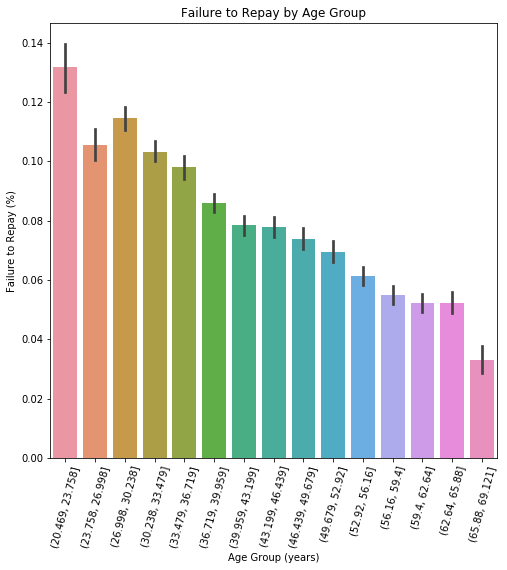

In [17]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
px = age_data['equal_width_age']
py = age_data['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [18]:
# 新增欄位 "equal_freq_age", 對年齡做等頻劃分
age_data['equal_freq_age']  = pd.qcut(age_data['YEARS_BIRTH'], 15)

# 觀察等頻劃分下, 每個種組距各出現幾次
age_data['equal_freq_age'].value_counts() # 每個 bin 的資料筆數是一樣的

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(41.896, 44.395]    20515
(59.192, 62.63]     20514
(32.038, 34.682]    20512
(26.915, 29.488]    20508
(20.517, 26.915]    20503
(37.195, 39.496]    20502
(29.488, 32.038]    20501
(53.241, 56.093]    20499
(47.178, 50.173]    20498
(44.395, 47.178]    20497
(39.496, 41.896]    20497
(56.093, 59.192]    20495
(50.173, 53.241]    20494
(34.682, 37.195]    20490
(62.63, 69.121]     20486
Name: equal_freq_age, dtype: int64

In [19]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups  = age_data.groupby('equal_freq_age').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
equal_freq_age,,,
"(20.517, 26.915]",0.114764,8919.995903,24.438345
"(26.915, 29.488]",0.114638,10290.679247,28.193642
"(29.488, 32.038]",0.109068,11238.946832,30.791635
"(32.038, 34.682]",0.099210,12173.164294,33.351135
"(34.682, 37.195]",0.094778,13131.107272,35.975636
"(37.195, 39.496]",0.085894,13998.237684,38.351336
"(39.496, 41.896]",0.081622,14853.139191,40.693532
"(41.896, 44.395]",0.076139,15746.246405,43.140401
"(44.395, 47.178]",0.077719,16708.155681,45.775769


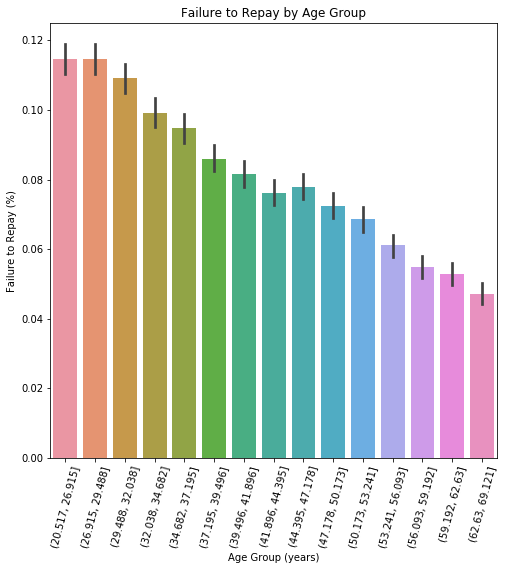

In [20]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
px = age_data['equal_freq_age']
py = age_data['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');